C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


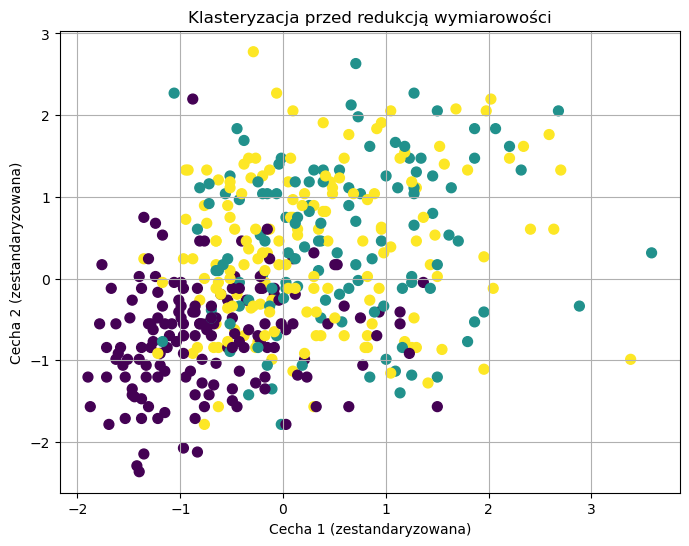

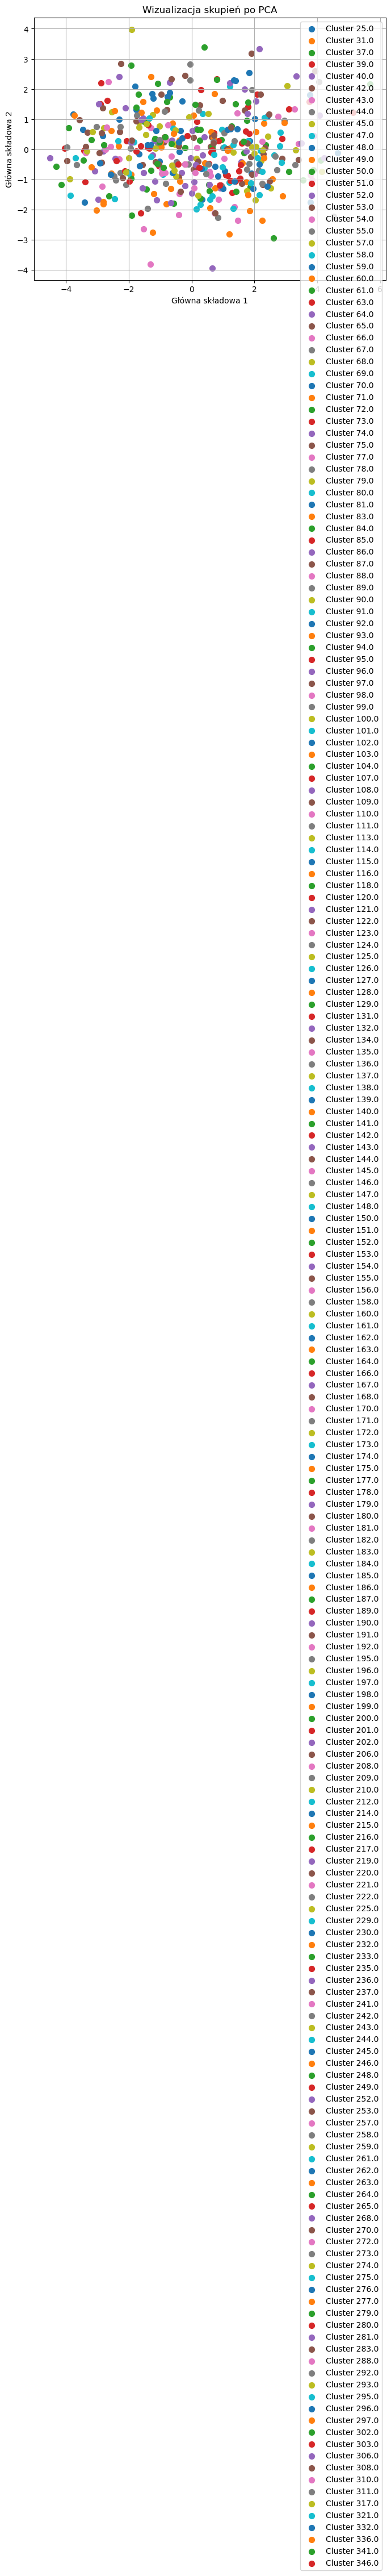

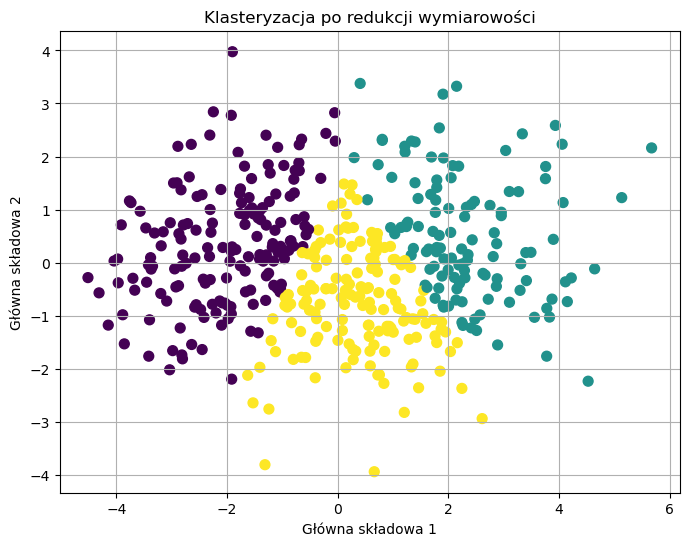

Wyjaśniona wariancja przez PCA: [0.40242108 0.14923197]


In [45]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes

# 1. Wczytanie danych (przykładowy zbiór Iris, możesz podmienić na własny zbiór)
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

# 2. Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# 3. Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=2)  # Redukcja do 2 głównych składowych
data_pca = pca.fit_transform(data_scaled)

# 4. Klasteryzacja przed redukcją wymiarowości
kmeans_full = KMeans(n_clusters=3, random_state=42)
labels_full = kmeans_full.fit_predict(data_scaled)

# 5. Klasteryzacja po redukcji wymiarowości
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(data_pca)

# 6. Wizualizacja wyników klasteryzacji przed redukcją
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 2], data_scaled[:, 3], c=labels_full, cmap='viridis', s=50)
plt.title('Klasteryzacja przed redukcją wymiarowości')
plt.xlabel('Cecha 1 (zestandaryzowana)')
plt.ylabel('Cecha 2 (zestandaryzowana)')
plt.grid()
plt.show()

# 7. Wizualizacja wyników PCA
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(
        data_pca[labels == label, 0],
        data_pca[labels == label, 1],
        label=f"Cluster {label}",
        s=50
    )
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Wizualizacja skupień po PCA')
plt.legend()
plt.grid()
plt.show()

# 8. Wizualizacja wyników klasteryzacji po redukcji
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_pca, cmap='viridis', s=50)
plt.title('Klasteryzacja po redukcji wymiarowości')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.grid()
plt.show()

# 9. Wyjaśnienie wariancji przez główne składowe
explained_variance = pca.explained_variance_ratio_
print(f"Wyjaśniona wariancja przez PCA: {explained_variance}")


C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

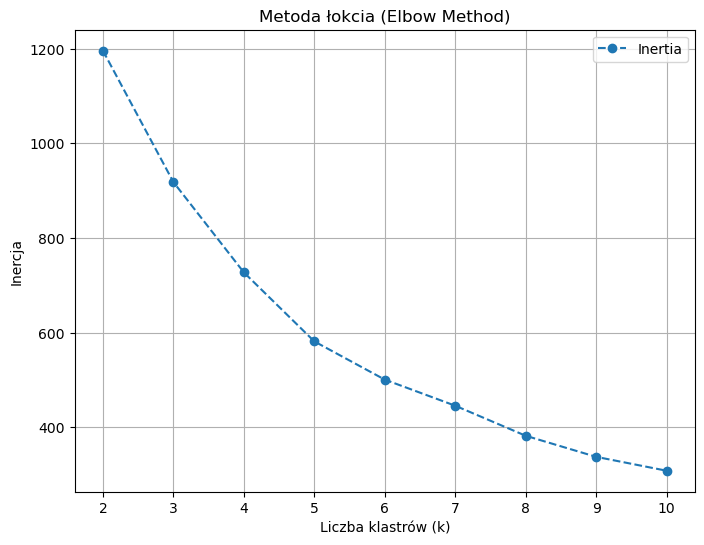

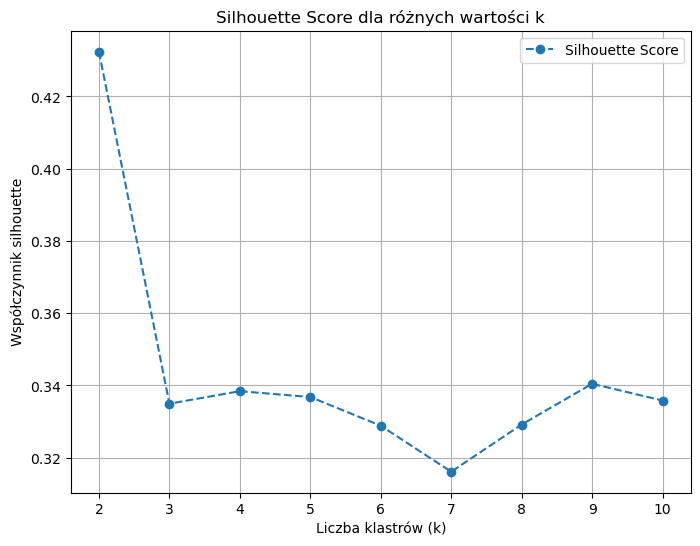

C:\Users\Tomasz 2115\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


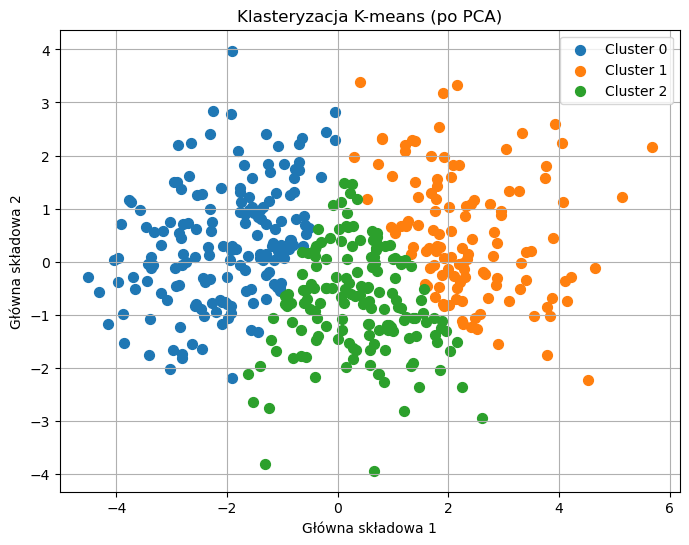

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ustawienie liczby wątków na 1, aby uniknąć problemów z MKL na Windows
os.environ["OMP_NUM_THREADS"] = "1"

# 1. Klasteryzacja K-means dla różnych wartości k
inertia = []  # Lista na wartości inercji
silhouette_scores = []  # Lista na wyniki metryki silhouette
k_values = range(2, 11)  # Zakres wartości k (od 2 do 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)  # Użycie zredukowanych danych PCA
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

# 2. Wizualizacja metody "łokcia"
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inercja')
plt.title('Metoda łokcia (Elbow Method)')
plt.grid()
plt.legend()
plt.show()

# 3. Wizualizacja współczynnika silhouette
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Współczynnik silhouette')
plt.title('Silhouette Score dla różnych wartości k')
plt.grid()
plt.legend()
plt.show()

# 4. Wybór optymalnego k (np. na podstawie metody łokcia)
optimal_k = 3  # Przykładowa wartość wybrana po analizie
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data_pca)

# 5. Wizualizacja wyników klasteryzacji K-means (optymalne k)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        data_pca[kmeans_optimal.labels_ == cluster, 0],
        data_pca[kmeans_optimal.labels_ == cluster, 1],
        label=f'Cluster {cluster}',
        s=50
    )
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Klasteryzacja K-means (po PCA)')
plt.legend()
plt.grid()
plt.show()


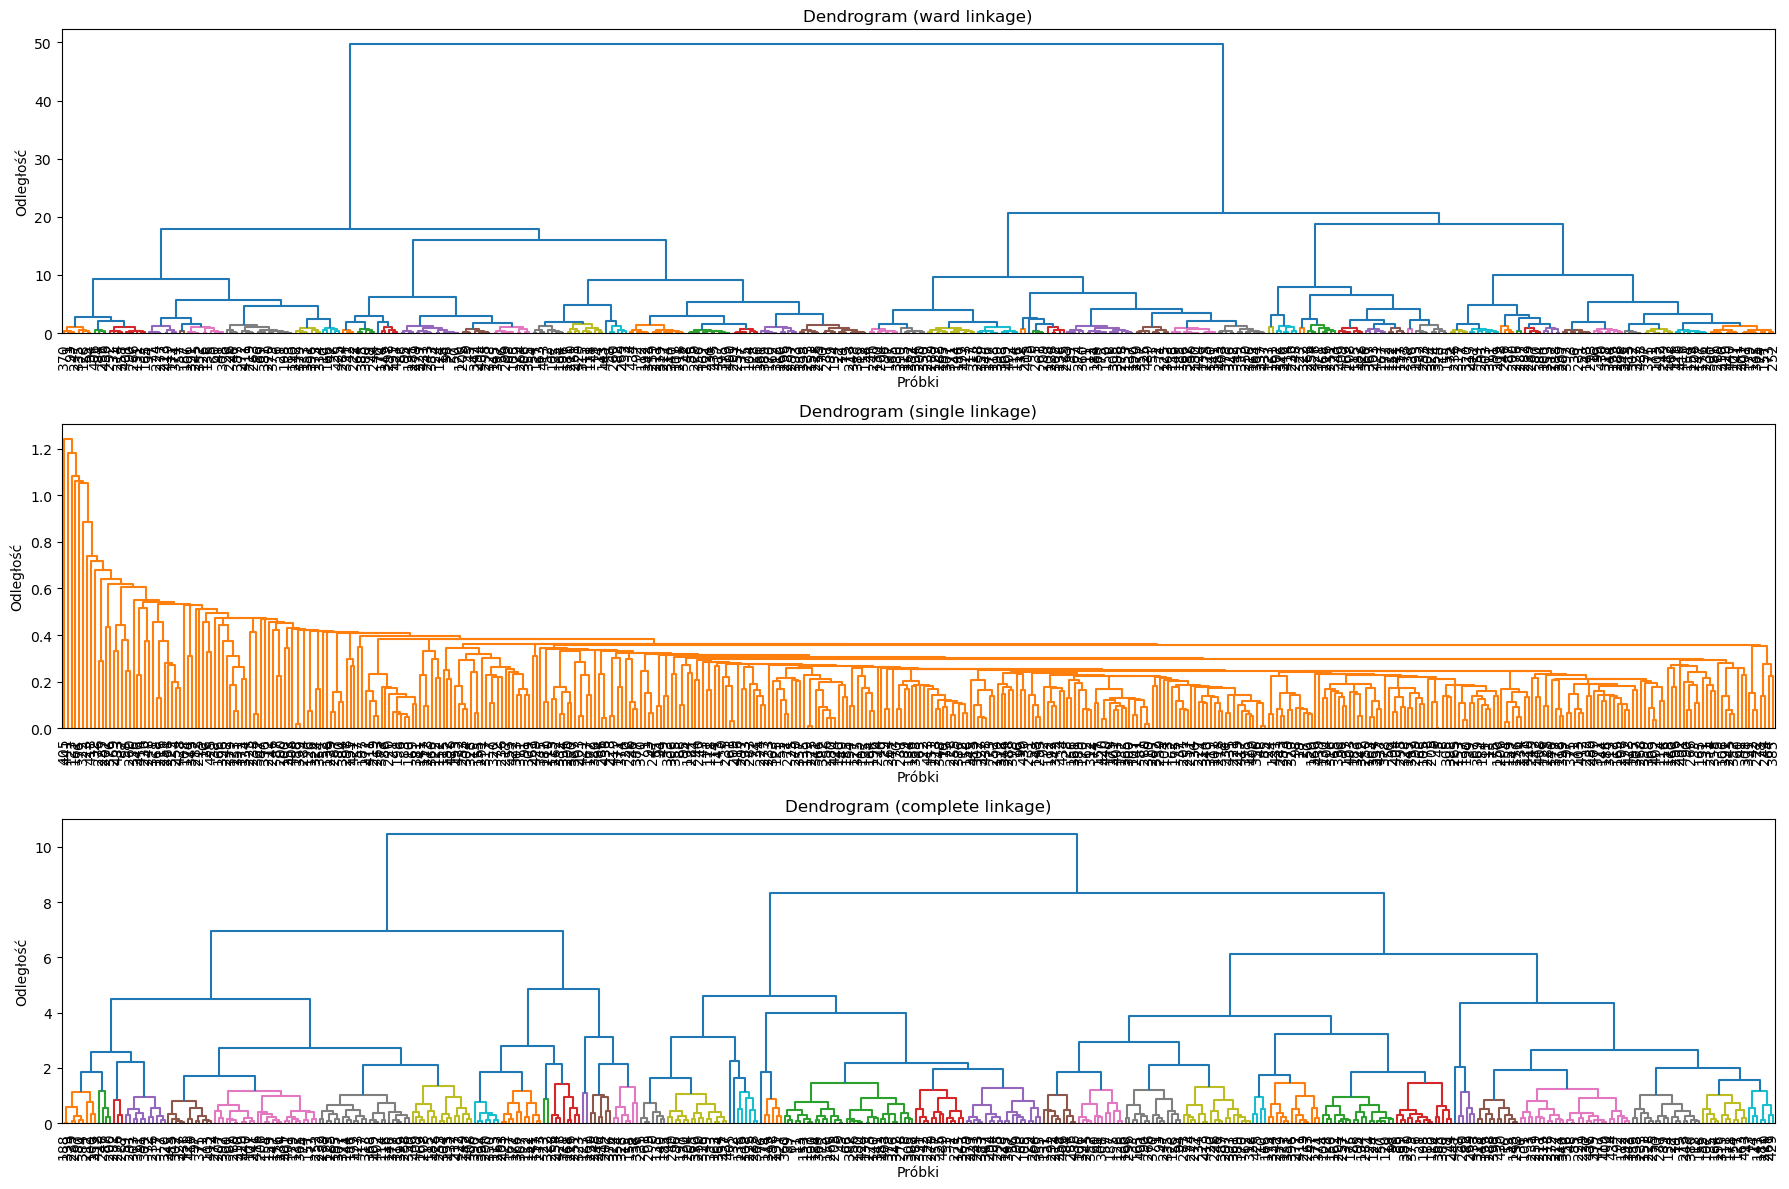

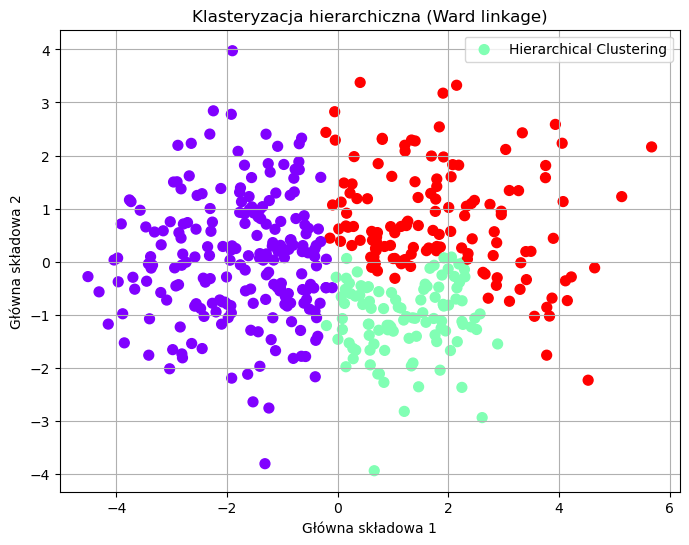

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Ustawienie liczby wątków na 1, aby uniknąć problemów z MKL na Windows
os.environ["OMP_NUM_THREADS"] = "1"

# 1. Wczytanie danych (przykładowy zbiór Iris)
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

# 2. Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# 3. Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=2)  # Redukcja do 2 głównych składowych
data_pca = pca.fit_transform(data_scaled)

# 4. Klasteryzacja hierarchiczna
methods = ['ward', 'single', 'complete']
plt.figure(figsize=(18, 12))  # Zwiększenie rozmiaru wykresów
for i, method in enumerate(methods):
    plt.subplot(3, 1, i + 1)  # Każdy dendrogram w osobnym wierszu
    Z = linkage(data_pca, method=method)
    dendrogram(Z, leaf_rotation=90, leaf_font_size=10, color_threshold=1.5)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Próbki')
    plt.ylabel('Odległość')
plt.tight_layout()
plt.show()

# 5. Wyodrębnienie klastrów na różnych poziomach dendrogramu
Z = linkage(data_pca, method='ward')
clusters_hierarchical = fcluster(Z, t=3, criterion='maxclust')

# 6. Porównanie wyników klasteryzacji hierarchicznej z K-means
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_hierarchical, cmap='rainbow', s=50, label='Hierarchical Clustering')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Klasteryzacja hierarchiczna (Ward linkage)')
plt.legend()
plt.grid()
plt.show()
